In [1]:
import numpy as np
import pandas as pd
import pylab as py

In [3]:
def accucheck(PM,q):
    sum = 0
    for i in range(len(city_name)):
        name = city_name[i]
        ename = name[-q:]
        if ename in Endset:
            iname = sufjoin(name, Addset[rowmax(PM,np.where(Endset == ename)[0][0])])
        else:
            iname = name + "ans"
        if iname == inhabitant_name[i]:
            sum += 1
            
    return sum*100.0/len(city_name)

def rowmax(M,i):
    maxi = M[i,0] 
    max_index = 0
    for j in range(len(M[0])):
        if M[i,j]>maxi:
            maxi = M[i,j]
            max_index = j
    return max_index


#Joins the suffix to city name to form inhabitant name

def sufjoin(n,s):
    vowels = ['i','e','u','a','o']
    jname = n + s
    if n[-1] in vowels and s[0] in vowels:
        if vowels.index(n[-1]) >= vowels.index(s[0]):
            jname = n[:-1]+s
        else:
            jname = n + s
    elif n[-1] not in vowels and s[0] not in vowels:
            jname = n[:-1]+s
    elif n[-1] == "y" and s[0] == "i":
            jname = n[:-1]+s
    return jname


#Creates the probability matrix for the top 10 most common suffixes and the last q letters of the city name.
#If q = 1 (say), it maps all the possible last letters to the most probably suffix given that letter. 

def PMG(q):
    Add = []
    End = []
    Change = []
    for i in range(len(city_name)):
        city = city_name[i]
        people = inhabitant_name[i]
        if len(city)<=len(people):
            for k in range(len(city)):
                if city[:len(city)-k] in people:
                    people = people.replace(city[:len(city)-k],'')
        if people[0] not in 'aeiou' and city[-1] in 'aeiou':
            people = city[-1]+people

        Add.append(people)
        End.append(city[-q:])
        Change.append(len(city) - len(people))

    Add_class = pd.Series(Add).value_counts(sort=True,normalize = True)[:10]  #Only take top 10 class
    Addset = np.array([Add_class.index[i] for i in range(len(Add_class))])
    End_prob = pd.Series(End).value_counts(sort=False,normalize = True).sort_index() #Taking all possible endings
    Endset = np.array(End_prob.index)

    PM = np.zeros([len(Endset),len(Addset)])
    for i in range(len(End)):
        if Add[i] in Addset:
            r_index = np.where(Endset == End[i])[0][0]
            c_index = np.where(Addset == Add[i])[0][0]
            PM[r_index,c_index] += 1
    #return (PM,Addset,Endset)
    
    D = {}
    for ename in Endset:
        D.update({ename:Addset[rowmax(PM,np.where(Endset == ename)[0][0])]})
    
    return D

def KeyGen(q):
    D = PMG(1)
    for i in range(2,q+1):
        D = {**D,**PMG(i)}
    return D

def accuracy(q,L,K,Ke):
#     Key = KeyGen(q)
    Distkey = list(Ke.keys())
    count = 0
    for i in range(len(L)):
        name = L[i]
        ename = name[-q:]
        if ename in Distkey:
            pname = sufjoin(name,Key[ename])
        else:
            while ename not in Distkey:
                ename = ename[1:]
            pname = sufjoin(name,Key[ename])


        if pname == K[i]:
            count += 1
            
    return count*100.0/len(L)


In [4]:
'''
LOADING DATA FROM CSV FILE
'''

raw_data = np.loadtxt("possible.csv",delimiter=",", dtype=str)
city_name = [raw_data[i][0] for i in range(len(raw_data))]
inhabitant_name = [raw_data[i][1] for i in range(len(raw_data))]

print("Original size of the data is : ",len(city_name))

Original size of the data is :  5687


In [5]:
'''CLEANING DATA FURTHER

REMOVED (CITY, INHABITANT) PAIRS THAT :

1) DO NOT START THE SAME WAY (FIRST 3 LETTERS NOT SAME)
2) hAD NO DIFFERENCE
3) HAD HUGE LENGTH DIFFERENCE
4) HAD SPECIAL CHARACTERS

MODIFIED PAIRS THAT :

5) HAD REDUNDANT WORDS E.G. (PORT OF KUMAN,KUMANI) CHANGED TO (KUMAN,KUMANI)

'''


i = 0
while i < len(city_name):
    x = city_name[i][:3]
    y = inhabitant_name[i][:3]
    if x != y:
        city_name[i] = "xxxx"
        inhabitant_name[i] = "xxxx"
        
    if city_name[i] == inhabitant_name[i]:
        city_name[i] = "xxxx"
        inhabitant_name[i] = "xxxx"
    
    if abs(len(city_name[i]) - len(inhabitant_name[i])) > 5:
        city_name[i] = "xxxx"
        inhabitant_name[i] = "xxxx"
    
    if city_name[i].split(' ')[0] in ['Parish','Port']:
        city_name[i] = city_name[i].split(' ')[-1]
        inhabitant_name[i] = inhabitant_name[i].split(' ')[-1]
        
    if city_name[i].split(' ')[-1] in ['City']:
        city_name[i] = ''.join(city_name[i].split(' ')[:-1])
        
    if inhabitant_name[i].split(' ')[-1] in ['people']:
        city_name[i] = "xxxx"
        inhabitant_name[i] = "xxxx"
        
    if city_name[i][-1] == "'":
        city_name[i] = "xxxx"
        inhabitant_name[i] = "xxxx"
        
    if inhabitant_name[i][-3:] == "ite":
        inhabitant_name[i] += "s"
        
    if inhabitant_name[i][-3:] == "ani":
        inhabitant_name[i] += "s"
    
    if inhabitant_name[i][-3:] == "ian":
        inhabitant_name[i] += "s"
    
    if inhabitant_name[i][-2:] == "an":
        inhabitant_name[i] += "s"
    
    if inhabitant_name[i][-1:] == "i":
        inhabitant_name[i] += "s"
        
    for j in city_name[i].lower():
        if j not in "abcdefghijklmnopqrstuvwxyz -'":
            city_name[i] = "xxxx"
            inhabitant_name[i] = "xxxx"
        
        
    i +=1
    
city_name = [j for i,j in enumerate(city_name) if j!="xxxx"]
inhabitant_name = [j for i,j in enumerate(inhabitant_name) if j!="xxxx"]

print("Size of final cleaned data set: ",len(city_name))

Size of final cleaned data set:  5179


In [6]:
'''
SPLITTING INTO TRAINING AND TEST SETS
'''

city_train = []
inhabitant_train = []
city_test = []
inhabitant_test = []
Validation_Set = []
Validation_Label = []
for i in range(len(city_name)):
    rando = np.random.rand()
    if rando <= 0.9:
        city_train.append(city_name[i])
        inhabitant_train.append(inhabitant_name[i])
    elif rando > 0.95:
        city_test.append(city_name[i])
        inhabitant_test.append(inhabitant_name[i])
    else:
        Validation_Set.append(city_name[i])
        Validation_Label.append(inhabitant_name[i])
        
city_name = city_train
Test_Set = city_test
inhabitant_name = inhabitant_train
Test_Label = inhabitant_test

#Test_Set = ['Tokyo','London','Delhi','Morocco','Paris','Mumbai','New York','Bangladesh','Kathmandu','Perth','Addis Ababa','Texas']

print("Size of Training Set is : ",len(city_name))
print("Size of Validity Set is : ", len(Validation_Set))
print("Size of Test Set is : ",len(Test_Set))

Size of Training Set is :  4702
Size of Validity Set is :  233
Size of Test Set is :  244


36.48068669527897


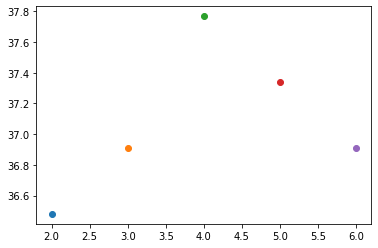

In [7]:
'''
Vaidation Set Result
'''

# for i in range(1,7):
#     py.scatter(i,accuracy(i,Validation_Set,Validation_Label))

for q in range(2,7):
    Key = KeyGen(q)
    py.scatter(q,accuracy(q,Validation_Set,Validation_Label,Key))
    
print(accuracy(2,Validation_Set,Validation_Label,Key))

33.60655737704918


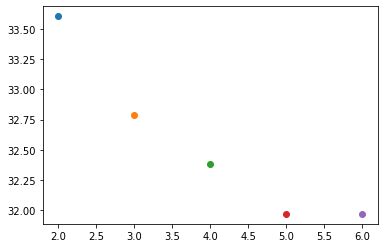

In [20]:
'''
Test Set Result
'''
q = 2
Key = KeyGen(q)
print(accuracy(q,Test_Set,Test_Label,Key))

for q in range(2,7):
    Key = KeyGen(q)
    py.scatter(q,accuracy(q,Test_Set,Test_Label,Key))

In [16]:
# '''
# """""""""""""""DEMO""""""""""""""""""""
# '''

# Place = ['Nellore']
# q = 4
# Distkey = list(Key.keys())
# for place in Place:
#     place = place.lower().capitalize()

#     ename = place[-q:]
#     if ename in Distkey:
#         pname = sufjoin(place,Key[ename])
#     else:
#         while ename not in Distkey:
#             ename = ename[1:]
#         pname = sufjoin(place,Key[ename])

#     print(pname)
    
# def sufjoin(n,s):
#     vowels = ['i','e','u','a','o']
#     jname = n + s
#     if n[-1] in vowels and s[0] in vowels:
#         if vowels.index(n[-1]) >= vowels.index(s[0]):
#             jname = n[:-1]+s
#         else:
#             jname = n + s
#     elif n[-1] not in vowels and s[0] not in vowels:
#             jname = n[:-1]+s
#     elif n[-1] == "y" and s[0] == "i":
#             jname = n[:-1]+s
#     return jname    
    
# def predict(place):
#     place = place.lower().capitalize()
#     q = 4
#     ename = place[-q:]
#     if ename in Distkey:
#         pname = sufjoin(place,Key[ename])
#     else:
#         while ename not in Distkey:
#             ename = ename[1:]
#         pname = sufjoin(place,Key[ename])

#     return pname

Nelloreans


In [19]:
# import json
# with open('key.txt','w') as data:  
#       data.write(str(Key))

In [ ]:
#Anything below this is not necessary

In [400]:
# Add = []
# End = []
# Change = []
# for i in range(len(city_name)):
#     city = city_name[i]
#     people = inhabitant_name[i]
#     if len(city)<=len(people):
#         for k in range(len(city)):
#             if city[:len(city)-k] in people:
#                 people = people.replace(city[:len(city)-k],'')
#     if people[0] not in 'aeiou' and city[-1] in 'aeiou':
#         people = city[-1]+people

#     Add.append(people)
#     End.append(city[-5:])
#     Change.append(len(city) - len(people))
    
# Add_class = pd.Series(Add).value_counts(sort=True,normalize = True)[:20]  #Only take top k class
# Addset = np.array([Add_class.index[i] for i in range(len(Add_class))])
# End_prob = pd.Series(End).value_counts(sort=False,normalize = True).sort_index() #Taking all possible endings
# Endset = np.array(End_prob.index)

# PM = np.zeros([len(Endset),len(Addset)])
# for i in range(len(End)):
#     if Add[i] in Addset:
#         r_index = np.where(Endset == End[i])[0][0]
#         c_index = np.where(Addset == Add[i])[0][0]
#         PM[r_index,c_index] += 1
        
# accucheck(PM,5)

66.60239931448157

In [97]:
# for i in range(len(city_name)):
#     if city_name[i][-1] == "'":
#         print(city_name[i],End[i],Add[i])

<Axes: >

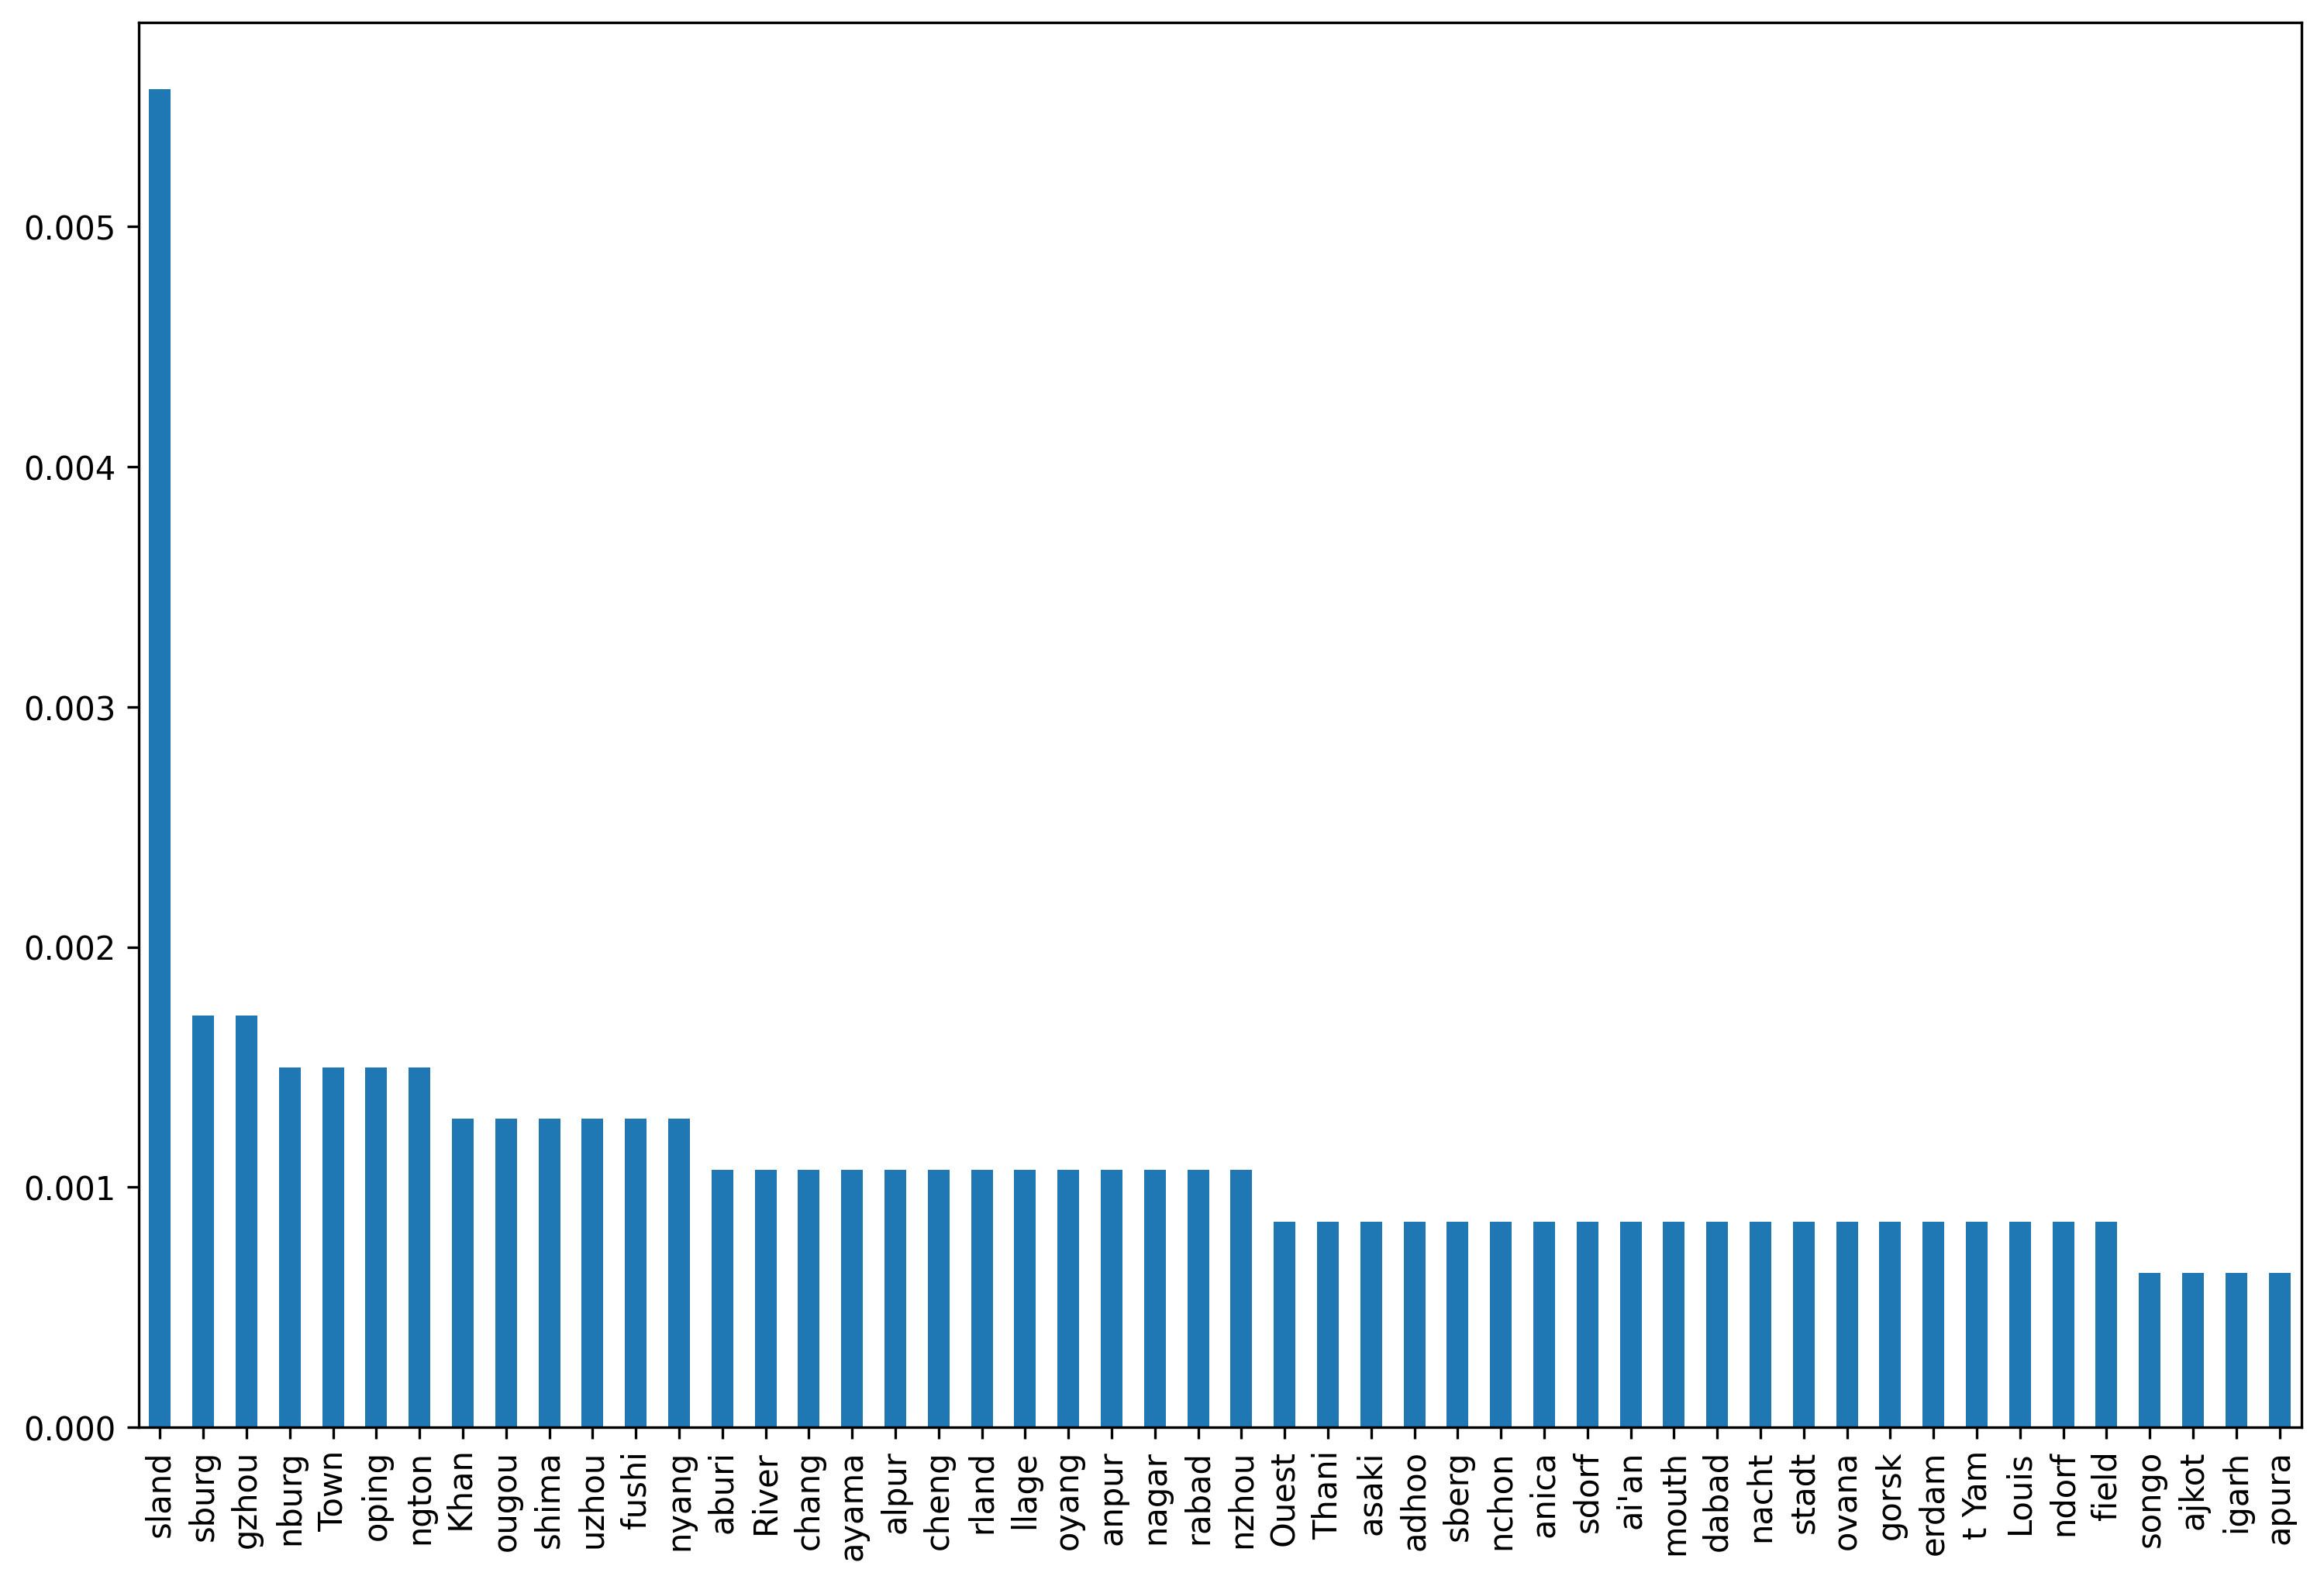

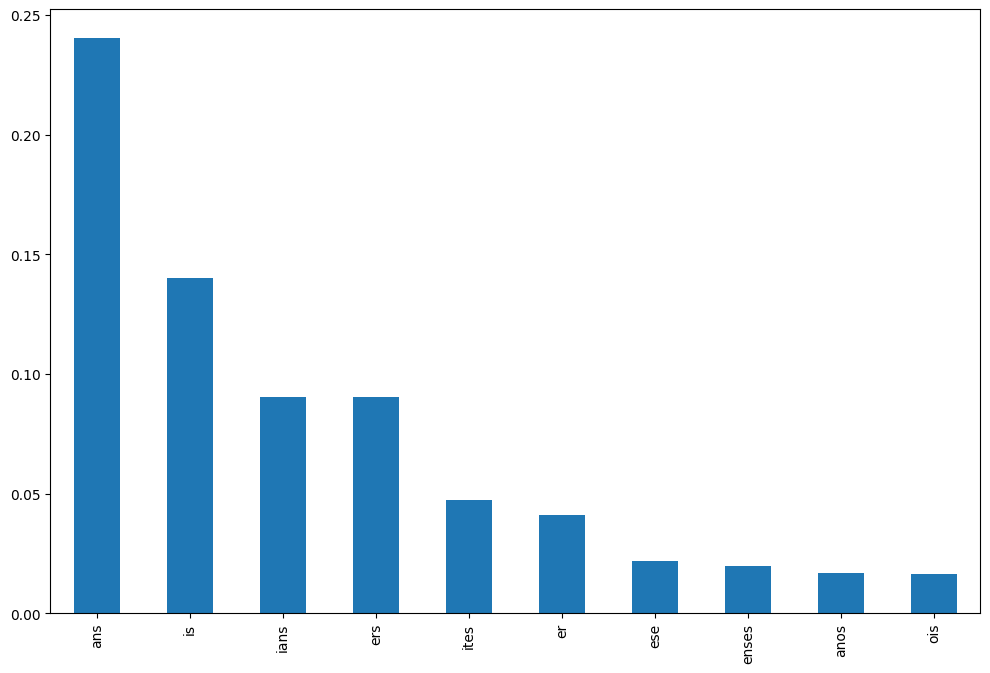

In [414]:
# fig = py.figure(figsize = (12,8),dpi = 300)
# pd.Series(End).value_counts(sort=True,normalize = True)[:50].plot(kind='bar')
# fig = py.figure(figsize = (12,8),dpi = 100)
# pd.Series(Add).value_counts(sort=True,normalize = True)[:10].plot(kind='bar')

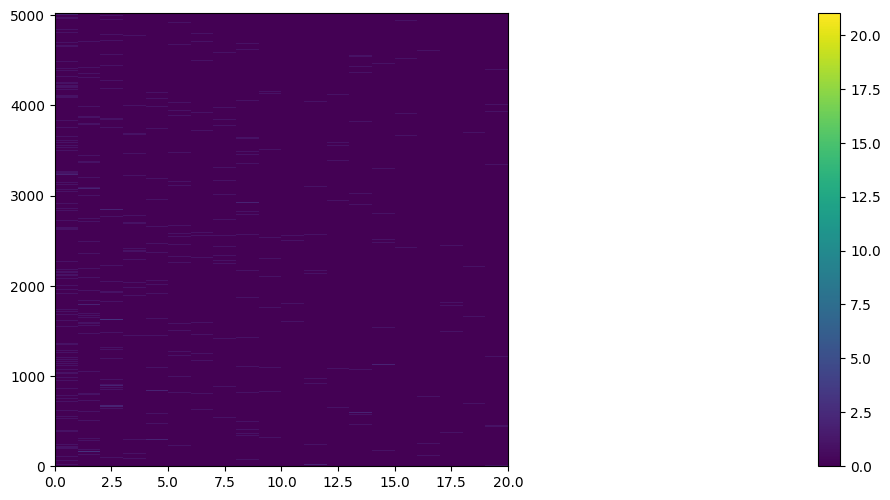

In [169]:
# fig = py.figure(figsize = (6,6),dpi = 100)
# fig.set_figwidth(80)
# py.imshow(PM,extent=[0,len(Addset),0,len(Endset)],aspect = len(Addset)/len(Endset),interpolation = "none")
# py.colorbar()
# py.show()

In [77]:
# PM, Addset, Endset = PMG(5)
# E = []
# A = []
# for ename in Endset:
#     print(ename,Addset[rowmax(PM,np.where(Endset == ename)[0][0])])

 Adam i
 Adde ians
 Addu i
 Alam i
 Alta ans
 Alto ans
 Aviv ians
 Baie ans
 Baja ans
 Bang ers
 Bank ers
 Bern ans
 Binh ians
 Brac ans
 Brak ans
 Brod ans
 Buri ans
 Cham ers
 Cruz ans
 Cuba ans
 Dawa ans
 Dinh ians
 Dios ans
 Dyke ers
 Dzor i
 East ians
 Farm ers
 Faso ans
 Fijo ans
 Flac ois
 Fora ans
 Fort ians
 Frio ans
 Ghar i
 Gora ans
 Haim ans
 Hall ers
 Hato ans
 Hill ois
 Igbo ans
 Jaya ans
 John ers
 Jose ans
 Juan ites
 Kaen ians
 Kang ans
 Keyh ans
 Khai ans
 Khan i
 Khas i
 Kord i
 Leon ans
 Lima ans
 Lipa ans
 Loka ans
 Long ers
 Lucy ians
 Luis ans
 Luka ans
 Maio ans
 Mare ans
 Marj ans
 Mens ers
 Mora anos
 Mors ers
 Nadu ans
 News ers
 Nhon ers
 Nile ans
 Ninh ians
 Novi ans
 Novo ans
 Oued ois
 Paki ans
 Paso ans
 Paul ites
 Port iens
 Quoc ers
 Rama enses
 Rang ers
 Raye ans
 Real ans
 Rica ans
 Rico ans
 Rios ians
 Rita ans
 Rock ers
 Rosa enses
 Roxo ans
 Saba ans
 Sacz ans
 Suef ians
 Sula ans
 Tarf is
 Tinh ians
 Tome ans
 Town ers
 Tree ans
 Tres enses
 Vary